# Plot the performance from the pickle files

In [6]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as clr

performance_dir = "tmp/na2d_model_13_05_friday/test"
start_epoch = 0

In [7]:
# Obtain the pickle files with statistics
stat_files = os.listdir(performance_dir)
stat_files.sort(key=lambda item: (len(item), item))
stat_files

['epoch_0.pkl',
 'epoch_1.pkl',
 'epoch_2.pkl',
 'epoch_3.pkl',
 'epoch_4.pkl',
 'epoch_5.pkl',
 'epoch_6.pkl',
 'epoch_7.pkl',
 'epoch_8.pkl',
 'epoch_9.pkl',
 'epoch_10.pkl',
 'epoch_11.pkl',
 'epoch_12.pkl',
 'epoch_13.pkl',
 'epoch_14.pkl',
 'epoch_15.pkl',
 'epoch_16.pkl',
 'epoch_17.pkl',
 'epoch_18.pkl',
 'epoch_19.pkl',
 'epoch_20.pkl',
 'epoch_21.pkl',
 'epoch_22.pkl',
 'epoch_23.pkl',
 'epoch_24.pkl',
 'epoch_25.pkl',
 'epoch_26.pkl',
 'epoch_27.pkl',
 'epoch_28.pkl',
 'epoch_29.pkl']

In [8]:
for idx, f in enumerate(stat_files):
    stats = pickle.load(open(os.path.join(performance_dir, f), "rb" ))
    if idx == 0:
        print(f"The performance measures: {list(stats.keys())}")
        overal_stats = dict()
        for key in stats.keys():
            overal_stats[key] = [stats[key]]
    else:
        for key in stats.keys():
            overal_stats[key].append(stats[key])

The performance measures: ['med_median_scaling', 'std_median_scaling', 'abs_rel', 'sq_rel', 'rmse', 'rmse_log', 'a1', 'a2', 'a3']


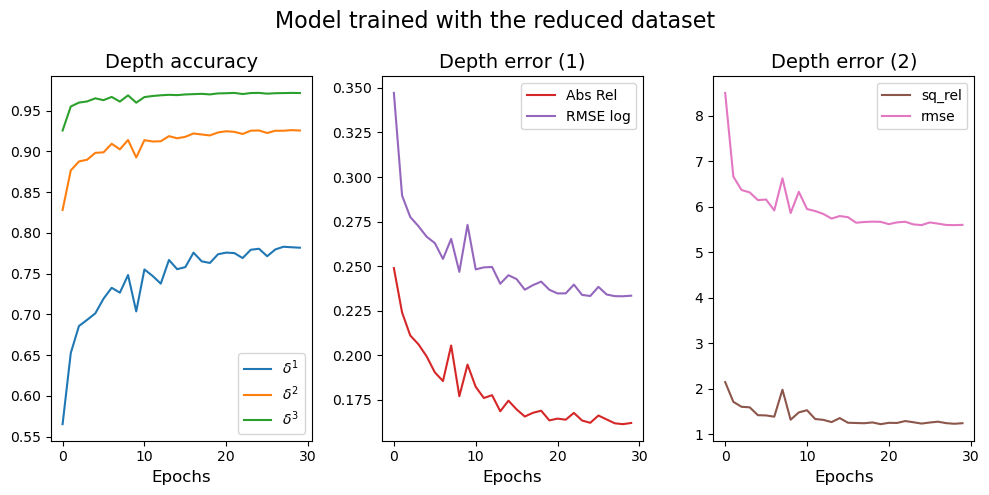

In [9]:
fig, axs = plt.subplots(1,3, figsize=(10,5))

colors = iter(clr.TABLEAU_COLORS.values())

axs[0].set_title("Depth accuracy", fontsize=14)
for key, label in zip(['a1', 'a2', 'a3'], [r'$\delta^1$', r'$\delta^2$', r'$\delta^3$']):
    axs[0].plot(np.arange(len(overal_stats[key])) + start_epoch, overal_stats[key], label=label, c=next(colors))
#     print(f"Max. of {key} after 35 epochs: {np.max(overal_stats[key][:35]):.3f}")
#     print(f"Max. of {key} after 50 epochs: {np.max(overal_stats[key]):.3f}")  

axs[1].set_title("Depth error (1)", fontsize=14)
for key, label in zip(['abs_rel', 'rmse_log'], ['Abs Rel', 'RMSE log']):
    axs[1].plot(np.arange(len(overal_stats[key])) + start_epoch, overal_stats[key], label=label, c=next(colors))
#     print(f"Max. of {key} after 35 epochs: {np.min(overal_stats[key][:35]):.3f}")
#     print(f"Max. of {key} after 50 epochs: {np.min(overal_stats[key]):.3f}")  

axs[2].set_title("Depth error (2)", fontsize=14)  
for key, label in zip(['sq_rel', 'rmse'], ['Sq Rel', 'RMSE']):
    axs[2].plot(np.arange(len(overal_stats[key])) + start_epoch, overal_stats[key], label=key, c=next(colors))
#     print(f"Max. of {key} after 35 epochs: {np.min(overal_stats[key][:35]):.3f}")
#     print(f"Max. of {key} after 50 epochs: {np.min(overal_stats[key]):.3f}")  


for ax in axs:
    ax.set_xlabel("Epochs", fontsize=12)
    ax.legend()

fig.suptitle("Model trained with the reduced dataset", fontsize=16)
plt.tight_layout()
# plt.savefig("reduced_model_performance.pdf")

In [10]:
for key in ['a1', 'a2', 'a3']:
    value = overal_stats[key]
    epoch = np.argmax(value)
    metric = value[epoch]
    print(f"{key}{(20 - len(key)) * ' '}: {metric:.3f} after {epoch+1} epochs")

for key in ['abs_rel', 'sq_rel', 'rmse', 'rmse_log']:
    value = overal_stats[key]
    epoch = np.argmin(value)
    metric = value[epoch]
    print(f"{key}{(20 - len(key)) * ' '}: {metric:.3f} after {epoch+1} epochs")

a1                  : 0.783 after 28 epochs
a2                  : 0.926 after 29 epochs
a3                  : 0.972 after 25 epochs
abs_rel             : 0.161 after 29 epochs
sq_rel              : 1.223 after 20 epochs
rmse                : 5.594 after 29 epochs
rmse_log            : 0.233 after 29 epochs
